<img src="https://teaching.bowyer.io/SDSAI/0/img/IMPERIAL_logo_RGB_Blue_2024.svg" alt="Imperial Logo" width="500"/><br /><br />

Manipulating and Visualising Data
==============
### SURG70098 - Surgical Data Science and AI
### Stuart Bowyer

## Intended Learning Outcomes
1.  Understand the primary methods for manipulating tabular data in python and why they are important for surgical data science
1.  Be able to perform basic data manipulation tasks using `pandas` and Regular Expressions, and know where to look for more information
1.  Plot data in python to address analytical questions using `matplotlib`


## Session Outline
1.  [Data Manipulation with pandas](#pandas)
1.  [Data Visualisation with matplotlib](#matplotlib)
1.  [String Manipulation with Regular Expressions](#regular_expressions)

# pandas
*   Much of the data science and AI methods we will cover in this course are based on analysing large amounts of data
*   `pandas` is a Python package that is very powerful and widely used. It allows you to read, manipulate, and write data efficiently and effectively
    *   https://pandas.pydata.org/
    *   Provides data structures to hold your data that make it easy to access, organise, and modify your data
    *   It is optimised for large data sets allowing you to work quickly
    *   It links with other libraries for visualising and learning from your data
    *   Has a wealth of online resources to support your use

## Installation and Setup
*   You can install pandas into your Colab runtime with  
```%pip install pandas```
*   Import pandas with  
```import pandas as pd```
*   We typically import it as pd because we will be calling it very often

In [2]:
%pip install pandas

import pandas as pd

Note: you may need to restart the kernel to use updated packages.


## Data Frames - Tabular Data
*   Tabular (2-dimensional) data are the foundation of most analyses and methods used in data science
*   In pandas (and many other data analytics packages/platforms) data tables are called a `DataFrame`

![pandas data frame](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)
<small><p>Copyright 2024 <a href=https://pandas.pydata.org/docs>pandas</a> - <a href=https://opensource.org/license/bsd-3-clause>BSD 3-Clause License</a></p></small>

### DataFrame Structure
Here is a sample DataFrame, `df`
*   The DataFrame has four columns
*   The columns are named with a string value (`A`, `B`, `C` and `D`)
*   In pandas, each column is called a 'series'
*   The DataFrame has 5 rows (note they are indexed from zero)
*   The columns of the DataFrame each can have a different data type (`float`, `float`, `string`, `datetime`)
*   However, all the values in each column must be the same type
*   This DataFrame is small, but they can hold GB of data

In [3]:
# Load an example dataframe
df = pd.read_csv("https://teaching.bowyer.io/SDSAI/2/data/test_df.csv")
df

,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


### DataFrame Properties
*   There are many functions that allow you to understand the properties of a dataframe.
*   A full list is available in the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

In [4]:
print(df.shape)             # Shape (#rows, #columns)
print(df.shape[0])          # Number of rows
print(df.shape[1])          # Number of columns
print(df.dtypes)            # The types of data in each column
print(df.columns.tolist())  # The names of the columns
print(df.index.tolist())    # The names of the rows

(5, 4)
5
4
A    float64
B    float64
C     object
D     object
dtype: object
['A', 'B', 'C', 'D']
[0, 1, 2, 3, 4]


### DataFrame Contents
#### Column (Series) Access
*   Elements within a dataframe can be accessed similarly to those in a list
*   Columns (called 'series') can be accessed with the square brackets
*   If you input a list of columns, a section of the dataframe will be returned

In [5]:
df['C']          # Access column (series) by name. e.g. column C

0    foo1
1    foo2
2    foo3
3    foo4
4    foo5
Name: C, dtype: object

In [6]:
df[['C','A']]    # Access multiple columns (series) by name

,C,A
0,foo1,0.0
1,foo2,1.0
2,foo3,2.0
3,foo4,3.0
4,foo5,4.0


#### Row and Element Access
*   Individual rows can be accessed with the `.loc` method
*   Individual elements can be accessed with the `.at` method
    *   Note here that you are using the row and column labels
*   Individual elements can be accessed with integer indices with the `.iat` method

In [7]:
print('loc:')
print(df.loc[1])                # Access row by index e.g. row 1

print('\nat:', df.at[1,'C'])    # Access single element by row and column values

print('\niat:', df.iat[1,3])    # Access single element by row and column indices

loc:
A           1.0
B           1.0
C          foo2
D    2009-01-02
Name: 1, dtype: object

at: foo2

iat: 2009-01-02


#### Modification
*   Similarly to lists, you can use the square bracket `[]` methods to modify the contents of a dataframe

In [8]:
df['B'] = [0.1,0.2,0.3,0.4,0.5]                 # Replace a column
df.loc[4] = [10.0,-1.0,"new-row",'2020-01-01']  # Replace a row
df.at[1,'C'] = "new-element"                    # Replace a single element

print('modified:')
df

modified:


,A,B,C,D
0,0.0,0.1,foo1,2009-01-01
1,1.0,0.2,new-element,2009-01-02
2,2.0,0.3,foo3,2009-01-05
3,3.0,0.4,foo4,2009-01-06
4,10.0,-1.0,new-row,2020-01-01


#### Useful Methods
*   You should familiarise yourself with the dataframe methods in pandas - https://pandas.pydata.org/docs/reference/frame.html
*   Here are some that you will find useful:

In [9]:
# Get only to top few rows of a dataframe (useful for debugging)
df.head()

# Get basic info about each column such as the number of missing values and data types
df.info()

# Print a selection of summary statistics for each column (more on this later)
df.describe()

# Sort the dataframe by a given column
df.sort_values('B')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      float64
 1   B       5 non-null      float64
 2   C       5 non-null      object 
 3   D       5 non-null      object 
dtypes: float64(2), object(2)
memory usage: 292.0+ bytes


,A,B,C,D
4,10.0,-1.0,new-row,2020-01-01
0,0.0,0.1,foo1,2009-01-01
1,1.0,0.2,new-element,2009-01-02
2,2.0,0.3,foo3,2009-01-05
3,3.0,0.4,foo4,2009-01-06


#### Creating New Columns
*   You will often want to add new columns to a dataframe to contain derived or modified data
*   New columns can be created by simply assigning to a column that does not already exist
*   For example, here we add a new column called 'E' that contains the value of 'A' + 10
    *   This is the same as adding 10 to the value of every value individually
    *   This is often called 'elementwise'
    *   Arithmetic, comparison and logical operators also work here

In [10]:
df['E'] = df['A'] + 10
df

,A,B,C,D,E
0,0.0,0.1,foo1,2009-01-01,10.0
1,1.0,0.2,new-element,2009-01-02,11.0
2,2.0,0.3,foo3,2009-01-05,12.0
3,3.0,0.4,foo4,2009-01-06,13.0
4,10.0,-1.0,new-row,2020-01-01,20.0


#### Combining New Columns
*   In the previous example we added a constant value to a column
*   You can also apply operations row-by-row across multiple columns
*   For example, here we create a new column 'F' that shows if column 'A' is greater than 'B'

In [11]:
df['F'] = df['A'] > df['B']
df

,A,B,C,D,E,F
0,0.0,0.1,foo1,2009-01-01,10.0,False
1,1.0,0.2,new-element,2009-01-02,11.0,True
2,2.0,0.3,foo3,2009-01-05,12.0,True
3,3.0,0.4,foo4,2009-01-06,13.0,True
4,10.0,-1.0,new-row,2020-01-01,20.0,True


#### Filtering Data
*   The pandas access methods described previously make it straight forward to filter data
*   You will often have datasets with many observations where you are only interested in a subset of them, and filtering allows you to resolve this
*   For example, you have data from all patients; however, you are only interested in those who have been treated by a particular surgeon
*   This method takes advantage of the fact that the rows of a data frame can be 'selected' by inputting a list of bool values

In [12]:
# If we wanted row 0 and row 4
df[[True,False,False,False,True]]

,A,B,C,D,E,F
0,0.0,0.1,foo1,2009-01-01,10.0,False
4,10.0,-1.0,new-row,2020-01-01,20.0,True


*   Therefore, you can select rows by using any logical expression based on the other columns of a data frame
*   For example, if we wanted to filter the rows where A was greater than B, we can input the expression into square brackets

In [13]:
df[df['A'] > df['B']]

,A,B,C,D,E,F
1,1.0,0.2,new-element,2009-01-02,11.0,True
2,2.0,0.3,foo3,2009-01-05,12.0,True
3,3.0,0.4,foo4,2009-01-06,13.0,True
4,10.0,-1.0,new-row,2020-01-01,20.0,True


### ❓ Data Frames Quick Check
For the data frame below, what would the following return?
1. ```df['E']```
1. ```df.loc[2]```
1. ```df.at[4,'B']```
1. ```df.iat[2,4]```

In [27]:
df

,A,B,C,D,E,F
0,0.0,0.1,foo1,2009-01-01,10.0,False
1,1.0,0.2,new-element,2009-01-02,11.0,True
2,2.0,0.3,foo3,2009-01-05,12.0,True
3,3.0,0.4,foo4,2009-01-06,13.0,True
4,10.0,-1.0,new-row,2020-01-01,20.0,True


## Descriptive Statistics
*   A key advantage of pandas is the way that it allows you to easily analyse the tabular data contained within a DataFrame with builtin descriptive stats functions.
*   DataFrames can be summarised with a range of functions. A full list is available here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats
*   Note that different functions will apply to different data types. i.e. you can not calculate the mean of a series of strings.
*   Here we show several of the summary functions applied to the numerical series in column 'A'

In [14]:
print('Col A mean:', df['A'].mean())  # Column mean
print('Col A stdev:', df['A'].std())  # Column standard deviation
print('Col A min:', df['A'].min())    # Column minimum value
print('Col A max:', df['A'].max())    # Column maximum value

Col A mean: 3.2
Col A stdev: 3.96232255123179
Col A min: 0.0
Col A max: 10.0


### Full Table Descriptive Stats
*   You can apply many of the functions to whole dataframes
*   However, they will not work if some columns have incompatable types
*   If you do apply a function to a whole dataframe it will return a series

In [15]:
# Print the maximum of each column (note strings can have a maximum)
print('max:')
print(df.max())

# This would not work because some of the column types do not have an arithmetic mean
# df.mean()

# You can create new dataframes that will work
print('\nmean:')
print(df[['A','B']].mean())

max:
A          10.0
B           0.4
C       new-row
D    2020-01-01
E          20.0
F          True
dtype: object

mean:
A    3.2
B    0.0
dtype: float64


## Reading and Writing Data
*   Pandas can create data frames by reading from many types of input (file formats)
    *   e.g. CSV, excel, SQL, JSON, etc.
*   These files can be read with functions `pd.read_...`
    *   e.g. `pd.read_csv`, `pd.read_excel`, `pd.read_sql`, `pd.read_json`, etc.
*   Pandas can also write (save) data frames back into these file formats
    *   e.g. `pd.write_csv`, `pd.write_excel`, `pd.write_sql`, `pd.write_json`, etc.

### Filepaths
*   To use any of these functions you need to provide a filepath to the data file
*   This tells the code the location and name of the file
*   On a windows PC, these typically look something like:  
`C:\Users\YourUserName\Documents\MyData.xlsx`
*   However, on Colab, you do not have a local filesystem to store the file so there are three options
    *   Read the file from a web URL
    *   Upload the file at runtime using a special colab function
    *   Store the file on your google drive

#### URL Filepath
*   For the examples in tutorials we will often use URLs for data sources
*   Simply include the full URL including the starting `http://` or `https://`
*   **Obviously, you cannot publish the majority of medical data openly online**

In [16]:
url_filepath = 'https://teaching.bowyer.io/SDSAI/1/data/dummy_crp_data.csv'

#### Filepath of Upload to Colab
*   The Google Python package (that is always installed in Colab) includes an upload function  
`goolge.colab.files.upload()`
*   This will pop-up an upload box in the Colab notebook allowing you to locate a file from their computer to upload
*   More information is available here: https://colab.research.google.com/notebooks/io.ipynb

```python
# You need to import the Colab file upload module
from google.colab import files

# Then call the upload function which will store the file temporarily and return a usable filepath
upload_filepath = files.upload()
```

#### Google Drive Filepath
*   The Google Python package also includes an function to mount your Google Drive 
`goolge.colab.drive.mount()`
*   This will grant Colab access to your Google Drive with a specific filepath
*   It will also ask you permission for the access
*   Note, to use a file from your Google Drive, you will need to prepend the mount path you provided to the `mount()` function
*   More information is available here: https://colab.research.google.com/notebooks/io.ipynb

```python
# You need to import the Colab Google Drive module
from google.colab import drive

# Then call the mount function to 'mount' the google drive
drive.mount('/content/drive')

# Then you can access your files
gdrive_filepath = '/content/drive/My Drive/path_to_file_on_gdrive'
```

### Read CSV
*   Comma Separated Variable (CSV) are a common and simple way of storing data in text files
*   These files (typically) have rows of data where the value for each column is separated by a comma
```
patient_id, date_of_birth, height, weight
001, 2001-04-13, 1.65, 67
002, 1982-11-23, 1.45, 52
etc.
```
*   The `pd.read_csv` function can load them and has many helpful behaviours:
    *   It will interpret the first line of the CSV as the column labels
    *   It will do a decent job of inferring column types (sometimes struggles with datetime formats)
    *   It has lots of customisation options for differently formatted files

In [17]:
df_crp = pd.read_csv(url_filepath)
df_crp.head()

,patients,crp
0,Liam,0.1912 mg/L
1,Emma,0.0697 mg/L
2,Noah,6.063 mg/L
3,Amelia,8.7888 mg/L
4,Noah,6.1414 mg/L


### Write CSV
*   To write a pandas data frame to a CSV (or other format), call the `to_csv()` method of the data frame
*   You will also need to provide the filepath to save the file to
*   As with the `read_` functions, the `to_` functions are highly configurable
*   Unless you are saving the file to your google drive, you will need to download the file from Colab to your computer
*   Again, more information is available here: https://colab.research.google.com/notebooks/io.ipynb

In [18]:
df_crp.to_csv('./test.csv')

## Combining, Grouping, and Reshaping Data Frames
*   Combining, grouping, and reshaping data frames are common things you will need to do when working with clinical and surgical data

### Combining Data Frames
*   Combining data frames means combining data in rows or columns from two or more data frames together
*   Two typical uses for this are:
    *   Combining two or more data frames with the same structure into one table - i.e. combining surgical diagnosis data from two different time periods  
    *Think of this as stacking the data frames on top of each other*
    *   Combining two or more data frames to link information in different columns between them - i.e. working out whether patients with a specific diagnosis (from one table) also have had a specific surgery (from another table)  
    *Think of this as putting the two data frames next to each other*

#### Data Frame Concatenation
*   Concatenation (`pd.concat`) is used for combining dataset with the same structure, one on top of the other
*   Concatenation means linking things together in series
*   There are (less common) cases where you might want to concatenate data frames and series 'side-by-side' using `pd.concat` (see the docs)

![pandas concat tables](https://pandas.pydata.org/docs/_images/merging_concat_basic.png)
<small><p>Copyright 2024 <a href=https://pandas.pydata.org/docs>pandas</a> - <a href=https://opensource.org/license/bsd-3-clause>BSD 3-Clause License</a></p></small>

#### Data Frame Concatenation Example
*   For example, here we have two demographics datasets that we want to combine and analyse:
    *   One is from paediatric patients (< 18 years old)
    *   The other is from adult patients (>= 18 years old)
*   This operation will only work if the columns and types being concatenated are the same between inputs
*   Note the `pd.concat` function takes a list of data frames to concatenate together, therefore you can combine many in one operation

In [19]:
# Load the two demographics tables
df_adult = pd.read_csv("https://teaching.bowyer.io/SDSAI/2/data/demographics_adult.csv")
df_paediatric = pd.read_csv("https://teaching.bowyer.io/SDSAI/2/data/demographics_paediatric.csv")

# Concat the two demographics tables together
df_concat = pd.concat([df_adult, df_paediatric])

print("Rows in adult: ", df_adult.shape[0])
print("Rows in paeds: ", df_paediatric.shape[0])
print("Rows in concat:", df_concat.shape[0])

Rows in adult:  741
Rows in paeds:  259
Rows in concat: 1000


#### Data Frame Merging
*   Merging (`pd.merge`) is used for combining datasets when you want to link information between them
*   To use a merge, you will need a 'key' that exists in both tables to identify which rows relate to the same entity
*   The 'key' can be relate to a patient, a surgery, a clinician, a medical device or a range of other things
*   The 'key' is typically a number or simplified string to minimise the chance of key confusion (i.e. `patient_key` would be something like `012345` rather than `John A Doe`)

![pandas merge tables](https://pandas.pydata.org/docs/_images/merging_merge_on_key.png)
<small><p>Copyright 2024 <a href=https://pandas.pydata.org/docs>pandas</a> - <a href=https://opensource.org/license/bsd-3-clause>BSD 3-Clause License</a></p></small>

#### Data Frame Merging Example
*   For example, here we consider the case where we want to link information from patient demographics to a surgical outcome
*   Specifically, we want to know whether gender (stored in demographics data frame) is associated with increased recovery time (stored in recovery data frame)

In [20]:
df_demographics = pd.read_csv("https://teaching.bowyer.io/SDSAI/2/data/demographics.csv")
df_demographics.head()

,id,firstname,lastname,date_of_birth,gender,ethnicity_code
0,1,Christine,Richard,2020-10-06,Female,Z
1,2,Tammie,Chang,2011-03-05,Female,P
2,3,Craig,Fisher,2008-03-14,Male,P
3,4,Cody,Green,2005-11-10,Male,N
4,5,Cassidy,Dixon,1964-01-11,Female,D


In [21]:
df_recovery = pd.read_csv("https://teaching.bowyer.io/SDSAI/2/data/simple_recovery.csv")
df_recovery.head()

,id,recovery_days
0,994,9.6470
1,860,10.5188
2,299,15.1428
3,554,4.3867
4,673,14.7204


#### Data Frame Merging Example
*   The `pd.merge` refers to its inputs as `left` and `right`, by specifying these inputs to be our two tables that share the `id` key we can link the data
*   The `on` parameter lets you specify which column to use as the key and you can use multiple if needed

In [22]:
df_merged = pd.merge(df_demographics, df_recovery, on='id')

df_merged.head()

,id,firstname,lastname,date_of_birth,gender,ethnicity_code,recovery_days
0,1,Christine,Richard,2020-10-06,Female,Z,10.7129
1,2,Tammie,Chang,2011-03-05,Female,P,12.2275
2,3,Craig,Fisher,2008-03-14,Male,P,13.4941
3,4,Cody,Green,2005-11-10,Male,N,9.5182
4,5,Cassidy,Dixon,1964-01-11,Female,D,21.8946


#### Data Frame Merging Nuances
*   There are two important considerations for this form or merge:
    1.   What happens when keys are repeated in one or both columns
    1.   What happens when keys do not exist in both of the columns
*   In these instances, the outcome is defined by the type of merge applied (specified using the `how` parameter)
    *   `left`: use only keys from left frame; preserve key order.
    *   `right`: use only keys from right frame; preserve key order.
    *   `outer`: use union of keys from both frames; sort keys lexicographically.
    *   `inner`: use intersection of keys from both frames; preserve the order of the left keys.
    *   `cross`: creates the cartesian product from both frames, preserves the order of the left keys.
*   Review the documentation for more detail https://pandas.pydata.org/docs/user_guide/merging.html#merge-types

### Grouping Data Frames
*   Once you have your data in a single data frame, you will often want to apply some of the descriptive statistics we covered previously

In [23]:
print('The mean recovery (days) is', df_merged['recovery_days'].mean())

The mean recovery (days) is 11.2567577


*   To make this useful, you typically need to apply the descriptive statistics based on some characteristic of the data set, rather than everything
*   E.g. in the previous example, we want to compare recovery times by gender
    *   You could filter the data and split it into multiple different data frames
    *   However, `groupby` provides a simple solution

#### `groupby`
*   This function takes a list of columns to apply the grouping based on
*   It returns a special data frame such that future operations are applied group-wise

In [24]:
# Group the data frame
df_grouped = df_merged.groupby(['gender'])

# Get the mean of the recovery_days column by group
df_grouped['recovery_days'].mean()

gender
Female        12.345797
Male          10.286873
Non-binary     8.356794
Name: recovery_days, dtype: float64

#### `groupby` Multiple Columns
*   As `groupby` can group on several columns, it can be helpful for exploring features within your data
*   For example, if we wanted to include an age category
*   For multiple grouping columns, the function will return the table of combinations with associated descriptive statistics

In [25]:
# Add a new column so specify (arbitrary) age group
df_merged['born_pre_2000'] = df_merged['date_of_birth'] < '2000-01-01'

# Group the data frame
df_grouped2 = df_merged.groupby(['gender', 'born_pre_2000'])

# Get the mean of the recovery_days column by group
df_grouped2['recovery_days'].mean()

gender      born_pre_2000
Female      False            12.415089
            True             12.308300
Male        False            10.059107
            True             10.400412
Non-binary  False             6.933717
            True              9.133018
Name: recovery_days, dtype: float64

### Reshaping Data
*   Tabular data is often referred to as either 'long' or 'wide' format
    *   Long - Each row represents a single **observation** (multiple rows for a single **subject**)
    *   Wide - Each row represents a single **subject** (multiple columns for different **observations**)
*   You will often need to reshape data between these two formats to apply analyses
*   Data can be reshaped 
    *   `pivot` - converts long to wide
    *   `melt` - converts wide to long
*   Note, we talk about subjects here; however, this could be more than just a patient. e.g. an admission, clinican, equipment, or any other entity from which multiple observations can be recorded

#### Pivot (long to wide format)
*   Wide formatted data are **typically**:
    *   Clearer to get an understanding of a single subject
    *   Better formatted for use with regression and machine learning methods and libraries
    *   Easier to present as human-readable tables
*   The following example uses some monitoring data taken from five different patients stored in a long format
    *   Each row represents a single sensor's observation of the patient
    *   Each patient has several associated rows

In [26]:
df_long = pd.read_csv("https://teaching.bowyer.io/SDSAI/2/data/long_monitoring.csv")

df_long.head(8)

,patient_id,taken_datetime,sensor,value
0,1,2024-10-01 09:15:01.822829,spo2,99.5 %
1,4,2024-10-01 09:15:32.100301,hr,76 bpm
2,3,2024-10-01 09:16:54.616240,temp,38.38 deg
3,3,2024-10-01 09:18:11.925814,bp,120/75 mmHg
4,1,2024-10-01 09:18:36.531250,bis,42
5,1,2024-10-01 09:24:17.762895,bp,105/72 mmHg
6,3,2024-10-01 09:25:14.057691,hr,62 bpm
7,5,2024-10-01 09:28:19.713776,bis,43


#### Pivot Example
*   To transform the above table from long to wide, we will use the pandas `pivot` method
*   https://pandas.pydata.org/docs/reference/api/pandas.pivot.html#pandas.pivot
*   Note that the `taken_datetime` column is lost from the data
*   Note how the wide (output) table is easier to quickly inspect and interpret (for a human) than the long version

In [27]:
df_wide = df_long.pivot(    # Call the pivot method of the long data frame
    index='patient_id',     # patient_id column used for the rows of the output - we want one row per patient
    columns='sensor',       # sensor column used to specify the output observation columns
    values='value'          # value column used to specify the values for each observation
)
df_wide

sensor,bis,bp,hr,spo2,temp
patient_id,,,,,
1,42,105/72 mmHg,84 bpm,99.5 %,37.22 deg
2,50,119/69 mmHg,86 bpm,99.9 %,36.2 deg
3,55,120/75 mmHg,62 bpm,99.0 %,38.38 deg
4,57,101/78 mmHg,76 bpm,99.5 %,37.74 deg
5,43,118/66 mmHg,92 bpm,96.2 %,36.05 deg


#### Pivot Table Example
*   There are two conditions when pivoting needs some consideration:
    *   What if some subject is missing some observations
    *   What if some subject has repeated observations
*   Repeated observations will cause `pivot` to fail
*   There is a more flexible version of `pivot` called `pivot_table` that has options to address this
*   https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table

In [28]:
# For example, remove the first pair of observations and duplicate the second pair
df_long_corrupt = df_long.drop(index=range(2)) 
df_long_corrupt = pd.concat([df_long_corrupt.loc[2:3], df_long_corrupt])

df_long_corrupt.pivot_table(
    index='patient_id',
    columns='sensor',
    values='value',
    aggfunc='min',              # Specify a function to apply to repeated observations
    fill_value='MISSING_VALUE'  # Specify a value to fill missing observations (default: NaN)
)

sensor,bis,bp,hr,spo2,temp
patient_id,,,,,
1,42,105/72 mmHg,84 bpm,MISSING_VALUE,37.22 deg
2,50,119/69 mmHg,86 bpm,99.9 %,36.2 deg
3,55,120/75 mmHg,62 bpm,99.0 %,38.38 deg
4,57,101/78 mmHg,MISSING_VALUE,99.5 %,37.74 deg
5,43,118/66 mmHg,92 bpm,96.2 %,36.05 deg


#### Melt (Wide to Long)
*   Long formatted data are **typically**:
    *   Clearer to get an understanding of a single observation
    *   Easier to manipulate and analyse (e.g. combining and grouping tables)
    *   Produced by medical systems and databases that hold heterogeneous data
    *   Simpler to visualise or plot
*   The following example uses some robotic data stored in a wide format
    *   Each row represents the state of a given instrument across several observations

In [29]:
df_wide = pd.read_csv("https://teaching.bowyer.io/SDSAI/2/data/wide_robot.csv")
df_wide

,instrument_id,x_pos,y_pos,z_pos,state
0,ROBOT0001,0.078102,-0.122152,0.741860,open
1,ROBOT0002,0.344303,0.233431,-0.186494,open
2,ROBOT0003,0.164421,-0.099860,0.466760,closed
3,ROBOT0004,0.071813,0.626837,0.046232,moving


#### Melt Example
*   To transform the above table from wide to long, we will use the pandas `melt` method
*   https://pandas.pydata.org/docs/reference/api/pandas.melt.html#pandas.melt
*   Note that the column names in the long table can be set with parameters

In [30]:
df_wide.melt(
    id_vars=['instrument_id'],                      # instrument_id column used for the IDs
    value_vars=['x_pos','y_pos','z_pos','state']    # other columns used for the values
)

,instrument_id,variable,value
0,ROBOT0001,x_pos,0.078102
1,ROBOT0002,x_pos,0.344303
2,ROBOT0003,x_pos,0.164421
3,ROBOT0004,x_pos,0.071813
4,ROBOT0001,y_pos,-0.122152
5,ROBOT0002,y_pos,0.233431
6,ROBOT0003,y_pos,-0.09986
7,ROBOT0004,y_pos,0.626837
8,ROBOT0001,z_pos,0.74186
9,ROBOT0002,z_pos,-0.186494


### ❓ Combining, Grouping and Reshaping Quick Check
1. What type of operation would you use to combine two data frames where both have the same columns?
1. What is 'wide' data?
1. What type of operation would you use to convert a long data frame to a wide one?
1. What type of operation would you use to combine two datasets that contain different information and have a common key?

## Time Series Data
*   Time series data are data collected with with a date and/or time associated with each entry
*   Often these time series are sampled at regular intervals; however, not necessarily
*   Clinical observations (e.g. heart rate etc.) and robot data (e.g. pose, state, etc.) are commonly time series
*   For example, here is a heart rate time series dataset
*   Note the data and time in the `obs_time` column - we will call this combination a 'datetime'

In [48]:
ts = pd.read_csv('https://teaching.bowyer.io/SDSAI/2/data/hr_timeseries.csv')
ts.head(10)

,obs_time,hr
0,2024-10-01 00:00:00,54.30
1,2024-10-01 04:00:00,51.67
2,2024-10-01 08:00:00,80.37
3,2024-10-01 12:00:00,87.70
4,2024-10-01 16:00:00,96.33
5,2024-10-01 20:00:00,97.63
6,2024-10-02 00:00:00,45.30
7,2024-10-02 04:00:00,43.67
8,2024-10-02 08:00:00,68.37
9,2024-10-02 12:00:00,106.70


### Parsing Time Series
*   Though the `obs_time` column contains the full datetime pandas has interpreted it as a string
*   This means that you cannot perform any kind of mathematical analysis of the data, e.g. calculating the time between steps

In [32]:
type(ts.at[0,'obs_time'])

str

*   The solution to this is to parse the data as a `datetime`
*   `datetime`s represent the data as an integer which means you can compare/convert/add/subtract datetimes

In [33]:
# Parse the datatime
ts['obs_time'] = pd.to_datetime(ts['obs_time'])

# Calculate the difference between timestep 1 and 2
ts.at[1,'obs_time'] - ts.at[0,'obs_time']

Timedelta('0 days 04:00:00')

### Time Series Basic Functions
*   As mentioned, the datetime type has many properties that make it helpful for analysing time series data
*   As they are fundamentally integers, all of the operators covered previously can be applied

In [34]:
ts.at[1,'obs_time'] + pd.Timedelta(hours=2) # Add an amount of time

ts.at[1,'obs_time'] < ts.at[1,'obs_time']   # Logical comparisons

ts['obs_time'].mean()                       # Standard mathematical descriptive stats
ts['obs_time'].min()
ts['obs_time'].max()

Timestamp('2024-10-04 20:00:00')

### The dt Attribute
*   pandas datatime types have many properties that can be used to analyse time series data
*   These properties are available through the `.dt` attribute of the datetime
*   https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-components
*   This allows you to analyse a time series based on features such as day of the week, day of the year, week of the year etc.
*   For example, considering the previous heart rate data, if we wanted to explore the average HR value at different times of day, we can group the data by day of the week...

In [35]:
ts_grouped = ts.groupby(ts['obs_time'].dt.hour)
ts_grouped['hr'].describe()

,count,mean,std,min,25%,50%,75%,max
obs_time,,,,,,,,
0,4.0,53.55,10.626225,45.30,46.05,50.30,57.80,68.30
4,4.0,48.17,9.574271,37.67,42.17,47.67,53.67,59.67
8,4.0,69.87,7.141428,65.37,65.37,66.87,71.37,80.37
12,4.0,100.20,10.969655,87.70,92.95,100.70,107.95,111.70
16,4.0,111.08,9.912114,96.33,109.83,115.33,116.58,117.33
20,4.0,88.38,6.652067,82.63,84.13,86.63,90.88,97.63


## Processing Text Data
*   When working with 'real' data, you will commonly find parameters of interest encoded in strings
*   As with datetimes, being a string means you cannot apply other operators to analyse and use the data
*   For example:

In [36]:
df_str_data = pd.read_csv("https://teaching.bowyer.io/SDSAI/2/data/str_data.csv")
df_str_data.head(10)

,patient_id,hr,conscious_level,bp,microbio_culture
0,1,54.3 bpm,UNRESPONSIVE_3,96/72 mmHg,-
1,2,51.67 bpm,UNRESPONSIVE_3,96/70 mmHg,positive
2,3,80.37 bpm,VERBAL_1,95/65 mmHg,POSITIVE
3,4,87.7 bpm,VERBAL_1,105/64 mmHg,NEGATIVE
4,5,96.33 bpm,PAIN_2,109/78 mmHg,POS
5,6,97.63 bpm,VERBAL_1,106/73 mmHg,-
6,7,45.3 bpm,UNRESPONSIVE_3,108/80 mmHg,POS
7,8,43.67 bpm,VERBAL_1,120/67 mmHg,NEG
8,9,68.37 bpm,VERBAL_1,118/60 mmHg,negative
9,10,106.7 bpm,PAIN_2,91/73 mmHg,-


### The str Attribute
*   Similarly to datetimes, pandas strings have many methods that can manipulate them
*   These properties are available through the `.str` attribute of the string
    *   https://pandas.pydata.org/docs/user_guide/text.html#method-summary
*   Review the documentation for a full list of functions
*   In some cases, you will want to use a more powerful method called `regex` which we will cover later


#### Example 1 - removing units
*   The `removesuffix()` method allows you to easily remove a common pattern at the end of each value (e.g. a unit)
*   There is also a `removepreffix()`
*   This example shows remove the 'bpm' from the heart rate values
*   Note, even though these look like numbers the output is still a string
    *   You need to cast the column as a 'float'
*   Also, beware of white-space left behind when removing suffixes

In [37]:
df_str_data['hr_clean'] = df_str_data['hr'].str.removesuffix('bpm')
df_str_data['hr_numeric'] = df_str_data['hr'].str.removesuffix('bpm').astype('float')
df_str_data.head()

,patient_id,hr,conscious_level,bp,microbio_culture,hr_clean,hr_numeric
0,1,54.3 bpm,UNRESPONSIVE_3,96/72 mmHg,-,54.3,54.30
1,2,51.67 bpm,UNRESPONSIVE_3,96/70 mmHg,positive,51.67,51.67
2,3,80.37 bpm,VERBAL_1,95/65 mmHg,POSITIVE,80.37,80.37
3,4,87.7 bpm,VERBAL_1,105/64 mmHg,NEGATIVE,87.7,87.70
4,5,96.33 bpm,PAIN_2,109/78 mmHg,POS,96.33,96.33


#### Example 2 - Removing a Changing Prefix
*   In the `conscious_level` column you cannot easily use the `removepreffix()` method because each prefix is different
*   A useful method is `split()` which splits a string up at a given input pattern
*   This example shows how to split the `conscious_level` and keep the numerical part
*   The output of `split()` is a list of the 'split-up' parts, therefore we add the final `.str[1]` to select the second part, i.e. the number
*   Again, you need to cast the number to an integer

In [38]:
df_str_data['conscious_level_clean'] = df_str_data['conscious_level'].str.split('_').str[1]
df_str_data.head()

,patient_id,hr,conscious_level,bp,microbio_culture,hr_clean,hr_numeric,conscious_level_clean
0,1,54.3 bpm,UNRESPONSIVE_3,96/72 mmHg,-,54.3,54.30,3
1,2,51.67 bpm,UNRESPONSIVE_3,96/70 mmHg,positive,51.67,51.67,3
2,3,80.37 bpm,VERBAL_1,95/65 mmHg,POSITIVE,80.37,80.37,1
3,4,87.7 bpm,VERBAL_1,105/64 mmHg,NEGATIVE,87.7,87.70,1
4,5,96.33 bpm,PAIN_2,109/78 mmHg,POS,96.33,96.33,2


## Chaining Pipelines
*   You have already seen in the previous example that you can 'chain' together a sequence of pandas methods in order to build a pipeline
*   e.g. `df_str_data['conscious_level'].str.split('_').str[1]`
    *   Here the output of `df_str_data['conscious_level'].str` is put into `split()` which is then put into `str[1]`
*   The benefit of this is that it can make code cleaner and minimises cluttering your namespace with intermediate data frames that you never need again
*   You can do this with many of the operations we have covered
*   You can use a backslash on the end of a line to allow new lines to make your pipeline clearer
*   e.g. finding the maximum x, y and z positions for the instruments from the `wide_robot` dataset:

In [39]:
pd.read_csv("https://teaching.bowyer.io/SDSAI/2/data/wide_robot.csv") \
    .melt(id_vars=['instrument_id'], value_vars=['x_pos','y_pos','z_pos']) \
    .groupby('variable') \
    ['value'] \
    .max()

variable
x_pos    0.344303
y_pos    0.626837
z_pos    0.741860
Name: value, dtype: float64

# matplotlib
*   Now you are able to manipulate your data into whatever format you want, the next step is typically creating some graph, plot, or visualisation
*   `matplotlib` is a mature package for Python that allows you to visualise data in many ways
    *   https://matplotlib.org/
    *   Can create: line charts, bar plots, histograms, scatter plots, 3D plots, etc.
    *   Plots are highly configurable (e.g. style, colour, annotations, etc.)
    *   Can visualise thousands of data points efficiently
    *   Supports interactive visualisations

## Installation and Setup
*   You can install matplotlib into your Colab runtime with  
```%pip install matplotlib```
*   Import matplotlib with  
```import matplotlib.pyplot as plt```
*   We typically import it as plt because we will be calling it very often

In [40]:
%pip install matplotlib

import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


## Basic Plots
*   Plots in `matplotlib` are configured in stages, before you finally call `plt.show()` to output what you have produced
*   If you have used MATLAB, this will be familiar

### Basic Sequence Plot
*   The input values are specified in the `plot()` function
*   Additional features such as labels (e.g. `ylabel()` can then be added)
*   For example, you can plot a simple sequence of numbers:
    *   Here, the x values plotted simply correspond to the index value in the sequence

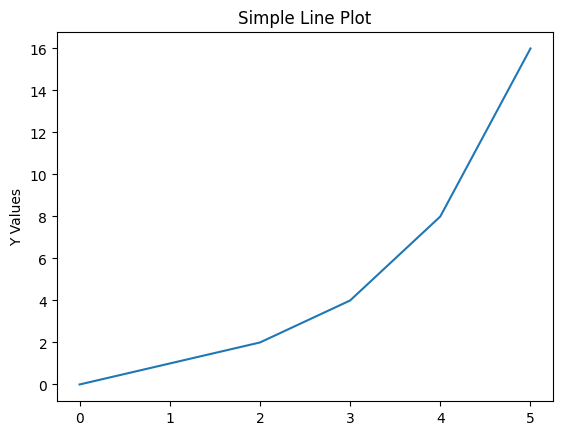

In [41]:
y_values = [0, 1, 2, 4, 8, 16]
plt.plot(y_values)
plt.title('Simple Line Plot')
plt.ylabel('Y Values')
plt.show()

### A Basic 2D plot
*   The x values for a plot can simply be input to the `plot()` function to plot 2 dimensional points
*   The format of each sequence can be controlled with the `color`, `linestyle`, and `marker` parameters of the `plot()` function

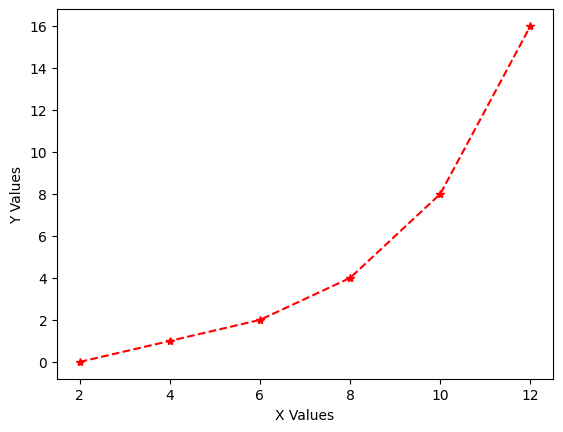

In [42]:
x_values = [2, 4, 6, 8, 10, 12]
y_values = [0, 1, 2, 4, 8, 16]
plt.plot(
    x_values, y_values,
    color='red', linestyle='--', marker='*'
)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.show()

### Multiple Series Plot
*   To view multiple series on the same plot, you just call `plot()` with each series
*   You can label the series with the `label` parameter
*   Then add a legend by calling the `legend()` function

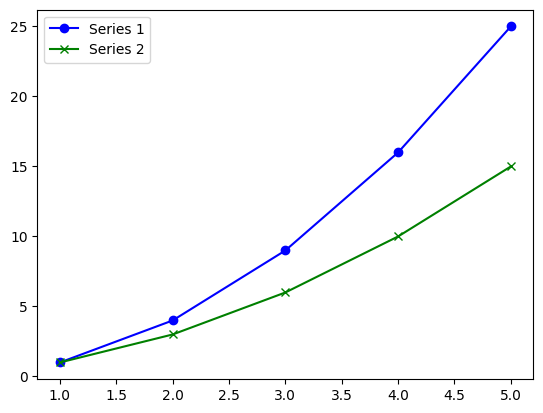

In [43]:
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
y2 = [1, 3, 6, 10, 15]

# Plot both series
plt.plot(
    x, y1, label='Series 1',
    color='blue', marker='o'
)
plt.plot(
    x, y2, label='Series 2',
    color='green', marker='x'
)

plt.legend()

plt.show()

### Subplots
*   You can use subplots (`plt.subplot()`) to plot data side-by-side
*   This is useful for things such as showing synchronised physiological data with different scales or multi-dimensional robot movement
*   The subplot function takes three inputs that define the grid of subplots:
    *   `nrows` specifies how many rows in the grid
    *   `ncols` specifies how many columns in the grid
    *   `index` specifies which element of the defined grid the next plot will appear on

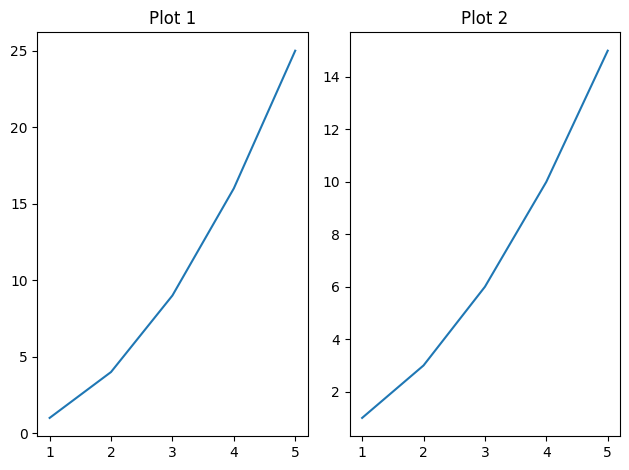

In [44]:
plt.subplot(1, 2, 1)
plt.plot(x, y1)
plt.title('Plot 1')

plt.subplot(1, 2, 2)
plt.plot(x, y2)
plt.title('Plot 2')

plt.tight_layout()
plt.show()

### Saving Plots
*   When you have a figure you are happy with, you will want to save it as an image file so that you can use it elsewhere
*   The `plt.savefig()` function allows this
*   As with saving in `pandas` you simply need to provide an output filepath
*   For example:

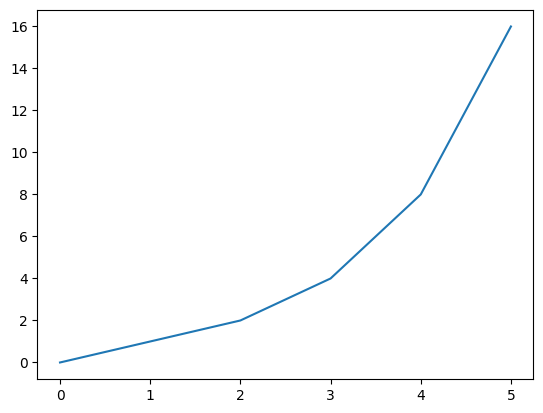

In [45]:
plt.plot(y_values)
plt.savefig('myplot.png')

## Plotting from pandas
*   pandas and matplotlib work well together and it is straight forward to plot pandas data
*   pandas timeseries and dataframes both have a `plot()` method that will make this easier

### Plotting pandas time series
*   For a single time series, simply calling the `plot()` method will generate a basic line plot
*   For example, plotting the 'hr' time series

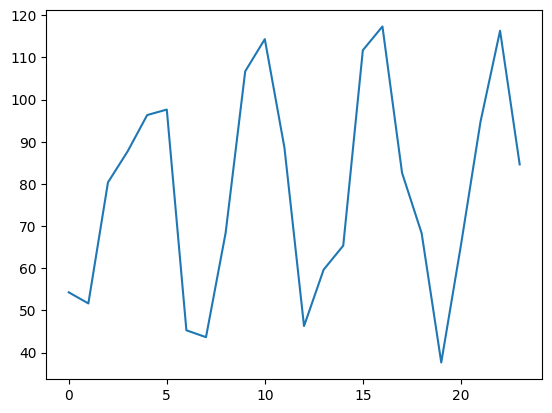

In [185]:
filepath = 'https://teaching.bowyer.io/SDSAI/2/data/hr_timeseries.csv'
df_hr = pd.read_csv(filepath)

ts_hr = df_hr['hr']

ts_hr.plot()
plt.show()


### Plotting pandas data frame
*   To plot two dimensional data from a data frame, you need to specify which column to use for the x and y
*   For example, to plot the heart rate data:
    *   We set `obs_time` as the x axis and `hr` as the y axis
    *   We also set the text rotation (`rot`) to 15 degrees to make the x labels easier to read

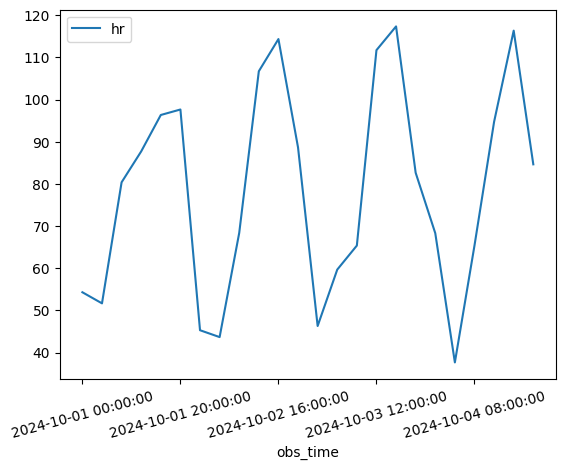

In [67]:
df_hr.plot('obs_time', 'hr', rot=15)
plt.show()

### Other pandas Plot Options
*   The [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) for pandas plot has many useful options for plotting data
*   You should review these when trying to create a more complex or 'prettier' plot
*   You can do things like:
    *   generating subplots for multiple sequences of data
    *   linking axes of subplots to align (e.g. timeseries) data
    *   log plotting
    *   setting labels/titles/etc.
    *   setting colour schemes
    *   setting plot types (e.g. line, bar, histogram, box, density, etc.)

## Other Plot Type Examples
### Bar Plot
*   To convert a line plot to a bar plot, you simply need to specify the plot type with the `kind` parameter to be `bar`

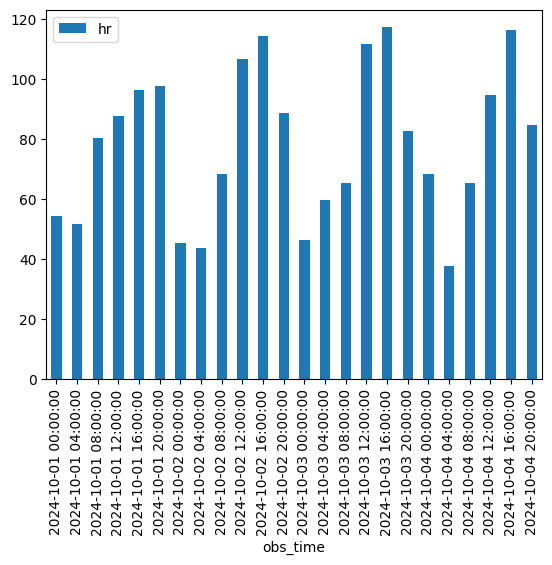

In [158]:
df_hr.plot('obs_time', 'hr', kind='bar')
plt.show()

### Boxplot
*   For boxplots (and similar plots which group data) you need to specify the column which defines each rows group
*   In this example, we will boxplot the heart rate distribution by time of day
*   The time of day is the group passed into the function for the `by` parameter

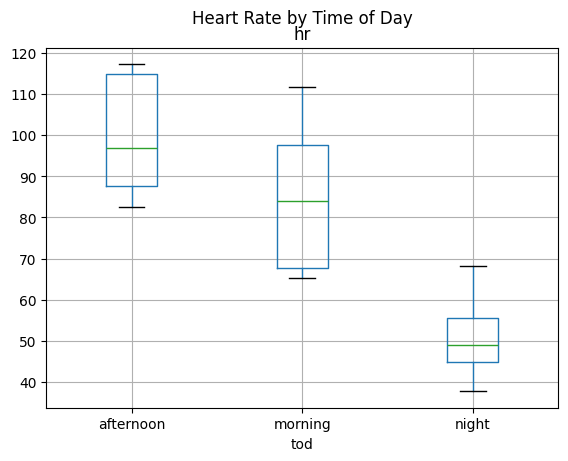

In [191]:
# This function converts datetime to time of day
def tod(hour):
    if hour <= 6:
        return 'night'
    elif hour <= 12:
        return 'morning'
    else:
        return 'afternoon'

# Generate a new column with the time of day
df_hr['hour'] = pd.to_datetime(df_hr['obs_time'])
df_hr['tod'] = df_hr['hour'].dt.hour.apply(tod)

# Generate the boxplot
df_hr.boxplot(column='hr', by='tod')
plt.suptitle('Heart Rate by Time of Day')
plt.show()

### Histogram
*   To demonstrate the histogram function, we will use the recovery time data introduced previously
*   Once loaded, the `hist()` function can be called
*   The only necessary parameter is the column to plot, in this case the `recovery_days` column
*   You can also specify more parameters for the histogram, such as the number of bins (parameter `bins`)

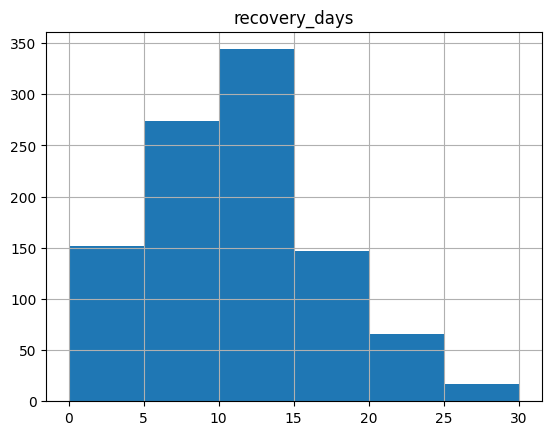

In [212]:
df_recovery = pd.read_csv("https://teaching.bowyer.io/SDSAI/2/data/simple_recovery.csv")
df_recovery.hist('recovery_days', bins=6)
plt.show()

# Regular Expressions
*   A 'Regular Expression' (commonly referred to as 'regex') are a way of describing patterns in strings
*   These are very powerful and extensively used to extract elements from text data
*   Unfortunately the syntax is not as readable as Python
*   If extracting complex structured data from strings, you may want to use regex rather than the pandas builtin functions as it is more concise
*   We will cover them briefly here, but if you want to use them, you will need to do further study (see the reading list)

## pandas str.contains
*   There are several pandas functions that use regex, but we will focus on `str.contains()`
*   The purpose of this method is to find elements in a series that match a regex pattern
*   You might also find `str.extract()` and `str.match()` useful for managing text data

## Literals
*   Literals are basic text strings that are matched exactly
*   For example, the following example matches the literal 'POSITIVE' in the microbiology culture column of the dataset
*   Literals are limited as you can only match one exact pattern
*   Note how this does not match lower-case 'positive'

In [228]:
# Load the only the microbiology culture column from the dataset
df = pd.read_csv("https://teaching.bowyer.io/SDSAI/2/data/str_data.csv", usecols=['microbio_culture'])

df['is_positive'] = df['microbio_culture'].str.contains('POSITIVE')
df

,microbio_culture,is_positive
0,-,False
1,positive,False
2,POSITIVE,True
3,NEGATIVE,False
4,POS,False
...,...,...
1995,+,False
1996,POS,False
1997,NEG,False
1998,NEGATIVE,False


## Metacharacters and Quantifies
*   Metacharacters are symbols that represent specific required patterns
    *   `.` (dot) matches any character
    *   `^` (caret) matches the start of a string
    *   There are several [more](https://www.w3schools.com/python/gloss_python_regex_metacharacters.asp)
*   Quantifiers specify the number of times a pattern should be matches
    *   `*` (star) matches any number of occurances (i.e. 0 or more)
    *   `+` (plus) matches one or more occurances
    *   `{n}` matches `n` occurances
* For example, say we wanted to match any string that starts POS (i.e. POSITIVE or POS) we could use the following:
    *   `POS.*` which matches POS and then any number of additional characters

In [229]:
df['is_positive'] = df['microbio_culture'].str.contains('POS.*')
df

,microbio_culture,is_positive
0,-,False
1,positive,False
2,POSITIVE,True
3,NEGATIVE,False
4,POS,True
...,...,...
1995,+,False
1996,POS,True
1997,NEG,False
1998,NEGATIVE,False


## Character Classes and Special Sequences
*   Character Classes are groups of characters where any one can be matches, and are defined in square brackets `[]`
    *   `[aeiou]` would match any string with a vowel
    *   You can use inner brackets to provide groups of patterns, e.g. `[(POS)(+)]` matches `POS` or `+`
*   Special Sequences are a backslash `\` followed by a character that defines a specific pattern or class
    *   `\d` matches digits, i.e. 0-9
    *   `\w` matches word characters, i.e. a-Z and 0-9
    *   For a full [list](https://www.w3schools.com/python/gloss_python_regex_sequences.asp)
*   **Do you notice anything unexpected in the matches of the following example?**

In [230]:
df['is_positive'] = df['microbio_culture'].str.contains('[(POS)(+)]')
df

,microbio_culture,is_positive
0,-,False
1,positive,False
2,POSITIVE,True
3,NEGATIVE,False
4,POS,True
...,...,...
1995,+,True
1996,POS,True
1997,NEG,False
1998,NEGATIVE,False


## Case Modifier
*   You can tell regex to be case insensitive with the following 'modifier' `/i`
*   In some versions of regex it is called with `(?i)`
*   For example, say we now wanted to match all POS, pos, POSITIVE, positive, + we could do the following:

In [234]:
df['is_positive'] = df['microbio_culture'].str.contains('[(?iPOS)(+)]')
df

,microbio_culture,is_positive
0,-,False
1,positive,True
2,POSITIVE,True
3,NEGATIVE,False
4,POS,True
...,...,...
1995,+,True
1996,POS,True
1997,NEG,False
1998,NEGATIVE,False


# Wrap Up
*   This lecture does not cover every function/concept you will need for later tasks or your project, you will need to use documentation and online resources to grow your skills
*   There is usually several ways to achieve the same output
    *   For now, prioritise: readability > performance > cleverness
*   pandas and matplotlib are not the only libraries for these functions
    *   `seaborn` is build ontop of matplotlib but provides a higher level interface for making plots
    *   `plotly` allows feature-full interactive visualisations that can be embedded in web documents

## Choosing Visualisation Types
*   Visualisations influence interpretation, so you need to try to avoid bias and encourage clear, honest, evidence-based understanding
*   Always consider context, audience and purpose before picking a visualisation format
*   Pretty plots are not necessarily informative plots
    *   Research has shown that 3D plots, pie charts (and presumably other radial plots) are not effective at communicating data
    *   For example:

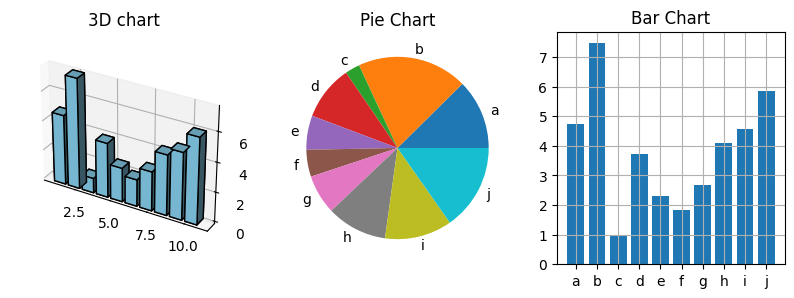

In [140]:
# This is just quick code to generate example plots. Don't worry about this
import numpy as np
np.random.seed(1)
n = 10
vals = np.random.uniform(1, 10, n)
idx = range(1,n+1)
labs = list(map(chr, range(97, 97+n)))

fig = plt.figure(figsize=(10, 6))

# Plot 1 (3D)
ax = fig.add_subplot(131, projection='3d')
ax.bar3d(idx, 0, 0, 0.8, 0.8, vals, color='skyblue', edgecolor='black')
ax.set_aspect('equal', adjustable='box')
ax.set_title('3D chart')
ax.get_yaxis().set_ticks([])

# Plot 2 (pie)
ax = fig.add_subplot(132)
ax.pie(vals, labels=labs)
ax.set_title('Pie Chart')

# Plot 3 (bar)
ax = fig.add_subplot(133)
ax.bar(labs, vals)
ax.grid()
ax.set_aspect(1.4)
ax.set_title('Bar Chart')

plt.show()


## Before Next Session
*   Review all these methods
*   Complete tutorial exercises
*   The [Leganto reading list](https://imperial.alma.exlibrisgroup.com/leganto/public/44IMP_INST/lists/45286392440001591?auth=SAML&section=45286392470001591) has:
    *   Further tutorials to review/extend the above material
    *   Resources on some important elements of data visualisation
    *   Tutorials on `numpy` another library for manipulating numerical data

# Tutorial Questions
## ❓ Exercise 2.1 - Identifying Elevated CRP Values (Again)
For this exercise, you need to repeat the CRP analysis you did in the previous tutorial, but now you can use the pandas functionality you have learnt. 

You have been given the (fake) data of five patients' C-Reactive Protein (CRP) tests. Write a function that computes and returns how many tests any selected patient-of-interest has had where their CRP values were elevated.

Each patient has multiple CRP values recorded in the dataset and all of the values are mixed together, randomly. To identify which value associates with which patient, you have also been given an aligned list of patient names.

*For example*:
> The first four entries of the test value list, `crp`, looks like this:  
> `crp = ['0.0 mg/L', '0.1301 mg/L', '1.4855 mg/L', '0.6009 mg/L', ...`
>
> And the first four entries of the patients list, `patients` looks like this:  
> `patients = ['Liam', 'Emma', 'Oliver', 'Oliver', ...`
>
> This means that the first value `0.0` was from `Liam`, the second value `0.1301` was from `Emma`, the third value `1.4855` was from `Oliver` as was the fourth value `0.6009`.

For this purpose, we will define an elevated CRP value as being more than 1.0 mg/L higher than the mean of all CRP tests that the specific patient has ever had.

### Hints
*   The data is here: `https://teaching.bowyer.io/SDSAI/1/data/dummy_crp_data.csv`
*   The suggested steps are:
    *   Load the data into a dataframe
    *   Clean the data so you can apply mathematical operators
    *   Write a function to compute which CRP values are elevated for an input series of values from a single patient
    *   The `groupby` and `apply` dataframe methods will help you complete the final step
*   Note, when you `apply` a function to a grouped dataframe, the grouping is lost. So, you might want to re-`groupby` your data 😉
*   You can achieve this using only 5 (or fewer) lines of code

## ❓ Exercise 2.2 - Pulse Pressure Analysis
In this lecture, we looked at some string data that represent physiological measurements.

For this exercise, you need to compute the mean, median and standard deviation for the pulse pressure values stored within the `str_data.csv` file as well as plotting the distribution of values in whichever way you think is most appropriate.

Hints:
*   The data are here: `https://teaching.bowyer.io/SDSAI/2/data/str_data.csv`
*   The blood pressure data are in the `bp` column
*   Both systolic and diastolic values are stored in the same column, so you will need to think about string manipulation to parse the numerical values out
*   We define pulse pressure as the difference between the systolic and diastolic blood pressure values
*   For the plot, we are interested in seeing the distribution of pulse pressure values across the whole population, i.e., which values are more/less common

## ❓ Exercise 2.3 - Visualising Demographics Data
Previously in this lecture we joined demographics and recovery time datasets together so that we could identify associations between them, i.e., does one gender typically have longer recovery times.

For this exercise, you are required to visualise the associations between age, ethnicity, gender and post-op laboratory test values with recovery time. For each of the visualisations, you should carefully think about what conclusions one can draw from them.

### Part 1
To start, produce appropriate visualisations (plots) for each of the following, to demonstrate any associations:
*   age vs recovery time
*   ethnicity vs recovery time
*   gender vs recovery time

### Part 2
Having produced these visualisations, you will note that there are many ethnicity codes, and each has relatively few patients. This can limit the information you can take from a plot. In these cases, it is sometimes beneficial to aggregate groups of patients together.

It is possible to group these ethnicities to a higher level and thus increase the number of people per group.

Therefore, you now need to produce a visualisation of the association between grouped ethnicity and recovery time. Suggested groups [from the NHS](https://digital.nhs.uk/data-and-information/data-collections-and-data-sets/data-sets/mental-health-services-data-set/submit-data/data-quality-of-protected-characteristics-and-other-vulnerable-groups/ethnicity): `White`, `Mixed`, `Asian or Asian British`, `Black or Black British`, `Other Ethnic Groups`, `Not Stated/Known`

### Part 3
The laboratory tests dataset contains results for a range of lab tests taken after surgery, in a long format.

Now, you need to produce visualisations that show the associations between each of these test types (individually) and recovery time.

### Part 4
Finally, you should be aware that an association between two observations does not necessarily illustrate causality. In these cases, confounding variables might be influencing the association.

To explore confounding, you can stratify your visualisations by a suspected confounding variable. Do some self research on stratified plots and produce one of these for each of the lab test vs recovery time visualisations from part 3.


### Hints
*   The data are here:
    *   `https://teaching.bowyer.io/SDSAI/2/data/demographics.csv`
    *   `https://teaching.bowyer.io/SDSAI/2/data/simple_recovery.csv`
    *   `https://teaching.bowyer.io/SDSAI/2/data/laboratory_tests.csv`
*   These data are all fake/semi-randomly generated, so for now, please do not think too hard about the real clinical meaning of each bit
*   We have not looked at the laboratory_test dataframe in this lecture, so you probably want to have a look at this data to understand how to use it before going too far